In [1]:
## Import Statements
import xarray
import numpy as np
import pyart
import metpy.calc as metcalc
from metpy.units import units
import proplot as pplt
import cv2 as cv2
import imageio

import math
import matplotlib.pyplot as pl
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from PIL import Image
import pandas as pd

import os, glob
import wildfire2 as wf2

import datetime
from netCDF4 import Dataset as ncDataset
import cartopy.crs as ccrs
import pyproj
import rasterio.crs
from rasterio import Affine
from rasterio.warp import reproject, Resampling
from rasterio.mask import mask
import numpy.ma as ma

import shapely
from shapely import geometry
from matplotlib import cm
import fiona

import satpy.modifiers.parallax as smp

from cartopy_map_utils import proj4_to_cartopy
import model as md
import echotop as et


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/196/jv1871/echotop.py:24: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def cloud_top_height(
/home/196/jv1871/echotop.py:132: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def column_max_reflectivity(r, azimuth, elevation, st_sweep, ed_sweep, refl):


In [2]:
## This method gets the satellite data for a particular channel.
## It then returns the data for the channel in question and the resolution.
def getSatelliteData(year, month, day, time, channel):
    path_sat = f'/g/data/ra22/satellite-products/arc/obs/himawari-ahi/fldk/latest/{year}/{month}/{day}/{time}/'
    if (channel == 'f1'):
        ## Visible Channels
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B01-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'f2'):
        ## Part of Visible Channels
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B02-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'f3'):
        ## Part of Visible Channels
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B03-PRJ_GEOS141_500-HIMAWARI8-AHI.nc'))
        resolution = 500
        return (data, resolution)
    elif (channel == 'f7'):
        ## Brightness Temperature 4µm channel 
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B07-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f8'):
        ## High level water vapor
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B08-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f9'):
        ## Mid-level water vapor
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B09-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f10'):
        ## Low-level water vapor
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B10-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f15'):
        ## Total Water
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B15-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f11'):
        ## Total water, stability
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B11-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f14'):
        ## Brightness Temperature 11µm channel
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B14-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f16'):
        ## Brightness Temperature 13µm channel
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B16-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f4'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B04-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'f5'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B05-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f6'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B06-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f13'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B13-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'fr1'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B01-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'fr2'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B02-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'fr3'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B03-PRJ_GEOS141_500-HIMAWARI8-AHI.nc'))
        resolution = 500
        return (data, resolution)
    elif (channel == 'fr4'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B04-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'fr5'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B05-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'fr6'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B06-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f_sza'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_GEOM_SOLAR-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'ctth'):
        path_para = f'/g/data/rv74/satellite-products/arc/der/himawari-ahi/cloud/ctth/{year}/{month}/{day}/'
        f_para = path_para + f'S_NWC_CTTH_HIMA08_HIMA-N-NR_{year}{month}{day}T{time}00Z.nc'
        data = xarray.open_dataset(f_para)
        return (data, np.nan)

In [3]:
## This method will upgrid a non-square array, given the original sizes, newSizes and of course the data
def RectangleUpGrid(data, originalI, originalJ, newI, newJ):
    ## Calcualtes the conversion factors for the corresponding sides
    i_conversion_factor = int((newI/originalI))
    j_conversion_factor = int((newJ/originalJ))
    step1 = np.zeros((newI, originalJ))
    ## Scaling up i axis first
    i_counter = 0
    ## Manually adds each new element into step1. 
    for i in range(newI):
        ## Only updates the i_counter for every conversion_factorith iteration (i.e. only needs to be updated for every 2nd, 4th, etc. iteration)
        if (i % i_conversion_factor == 0 and i_counter < originalI):
            i_counter += 1
        step1[i,:] = data[i_counter-1, :]
    final = np.zeros((newI, newJ))

    ## Now scaling up j axis
    i_counter = 0
    ## Manually adds each new element into final array.
    for i in range(newJ):
        ## Only updates the i_counter for every conversion_factorith iteration (i.e. only needs to be updated every 2nd, 4th, etc. iteration)
        if (i % j_conversion_factor == 0 and i_counter < originalJ):
            i_counter += 1
        final[:,i] = step1[:, i_counter-1]
    return final

In [4]:
## This is a new upGrid method that will take an array of a certain size (originalSize) and make ti larger (newSize)
## This method should have a O(n) running time, beating the previous O(n^2) running time
def newUpGrid(data, originalSize, newSize):
    ## Calculates by what factor the newArray needs to be larger by.
    conversion_factor = int((newSize/originalSize))
    ## For the first step, only the columns will be made larger. The rows will be left intact.
    step1 = np.zeros((newSize, originalSize))
    ## Manually adjusts the columns of the newArray with data from the previous old array.
    ## i_counter acts as a way to determine which particular row from newArray gets copied. 
    i_counter = 0
    for i in range(newSize):
        ## Only every conversion_factor time (i.e. 2nd or 4th time) does the i_counter need to be updated. For all other times, it is simply re-reading the data from the previous row.
        if (i % conversion_factor == 0):
            i_counter += 1
        step1[i,:] = data[i_counter-1, :]
    ## For the second (and final) step, the new rows will be made for the larger array, thereby completing the upsizing.
    final = np.zeros((newSize, newSize))
    i_counter = 0
    ## Manually
    for i in range(newSize):
        ## Only every conversion_factor time (i.e. 2nd or 4th time) does the i_counter need to be updated. For all other times, it is simply re-reading the data from the previous row.
        if (i % conversion_factor == 0):
            i_counter += 1
        final[:,i] = step1[:, i_counter-1]
        
    return final

In [5]:
## This is a method to scale up the x and y values of an array from originalSize to a bigger newSize.
def upGridXY(old_x, old_y, originalSize, newSize):
    ## Conversion factor determines the factor that a new array is being changed by.
    conversion_factor = int((newSize/originalSize))
    newX = np.zeros(newSize)
    newY = np.zeros(newSize)
    counter = 0
    ## Goes through the newArray and manually adds each element into the new data array.
    for i in range(newSize):
        newX[i] = old_x[counter-1]
        newY[i] = old_y[counter-1]
        ## Only on every conversion_factorith iteration (i.e. 2nd or 4th) does the counter need to be updated. For all other times, it is simply re-reading the data from the previous row.
        if (i % conversion_factor == 0):
            counter += 1
    finalX = np.zeros(newSize)
    finalY = np.zeros(newSize)
    finalX[0:-1] = newX[1:]
    finalX[-1] = newX[0]

    ## As a result of my incompetence (and it's a very easy fix in the above code), the first element should be in the last position in the array. The below process works to make this happen in each of the Y and X arrays.
    finalY[0:-1] = newY[1:]
    finalX[-1] = newX[0]
    return finalX, finalY

In [6]:
## This is a new method to filter the data based on desired latitude and longitude coordinates. The only inputs are the coordinates, x, and y values of the array.
def newFilterData(year, month, day, time, data, minLat, maxLat, minLon, maxLon, x, y):
    ## This will get the solar zenith angle data for the array. This channel is commonly used for projection information.
    f_sza = getSatelliteData(year, month, day, time, 'f_sza')[0]
    ## Convert to a pyproj object.
    fsza_proj4string = f_sza.geostationary.proj4
    p = pyproj.Proj(fsza_proj4string)

    ## Find the x and y values associated with the two opposite corners of the image.
    x1, y2 = p(minLon, minLat)
    x2, y1 = p(maxLon, maxLat)
    ## Finds the position that is closest to the x and y valeus calculated above.
    x1Index = (np.abs(x - x1)).argmin()
    x2Index = (np.abs(x - x2)).argmin()
    y1Index = (np.abs(y - y1)).argmin()
    y2Index = (np.abs(y - y2)).argmin()

    ##Throughout the dataset, y comes first and then x, so it is therefore necessary to flip the output of y and x as a result of how this was programmed. 
    ## Actually performed
    newData = data[y1Index:y2Index, x1Index:x2Index]
    newX = x[x1Index:x2Index]
    newY = y[y1Index:y2Index]
    return (newData, newY, newX)

In [7]:
## This method takes the visible imagery from three separate channels and combines them to make one visible image.
def getVisible(f1, f2, f3):
    vmin = 0
    vmax = .5

    ## Assignd the channels a value between 0 and 255.
    B1 = f1.clip(vmin, vmax) / vmax * 255
    B2 = f2.clip(vmin, vmax) / vmax * 255
    B3 = f3.clip(vmin, vmax) / vmax * 255

    ## Stacks the channels on top of each other required for visible imagery.
    rgb = np.stack((B3, B2, B1), axis=2).astype('uint8')
    return rgb

In [8]:
## This mehtod will provide a high-resolution satellite image for a specified area. This takes in the date and time, and returns a high-resolution visible image of an area.
def getHighResCroppedVisible(year, month, day, time, minLat, maxLat, minLon, maxLon):
    f1 = getSatelliteData(year, month, day, time, 'f1')[0]
    f2 = getSatelliteData(year, month, day, time, 'f2')[0]
    f3 = getSatelliteData(year, month, day, time, 'f3')[0]

    ## Filters the data so only the specified cooridnates appear in the image.
    filter_b1 = newFilterData(year, month, day, time, f1.channel_0001_scaled_radiance.values, minLat, maxLat, minLon, maxLon, f1.x.values, f1.y.values)[0]
    filter_b2 = newFilterData(year, month, day, time, f2.channel_0002_scaled_radiance.values, minLat, maxLat, minLon, maxLon, f2.x.values, f2.y.values)[0]
    filter_b3 = newFilterData(year, month, day, time, f3.channel_0003_scaled_radiance.values, minLat, maxLat, minLon, maxLon, f3.x.values, f3.y.values)[0]

    ## Resizes the array using cv2's resize method rather than my own upgrid method.
    up_b1 = cv2.resize(filter_b1, (filter_b3.shape[1], filter_b3.shape[0]))
    up_b2 = cv2.resize(filter_b2, (filter_b3.shape[1], filter_b3.shape[0]))

    ## Performs the parallax correction on the image - See the method for more detailed information on why this is needed.
    shifted_arr1 = new_get_HighRes_shifted_array(up_b1, minLat, maxLat, minLon, maxLon, year, month, day, time)
    shifted_arr2 = new_get_HighRes_shifted_array(up_b2, minLat, maxLat, minLon, maxLon, year, month, day, time)
    shifted_arr3 = new_get_HighRes_shifted_array(filter_b3, minLat, maxLat, minLon, maxLon, year, month, day, time)

    ## Interpolates any missing pixels that are in the image by finding values from surrounding pixels. Pixels may be missing as a result of parallax correction.
    interpolate_b1 = interpolate(shifted_arr1)
    interpolate_b2 = interpolate(shifted_arr2)
    interpolate_b3 = interpolate(shifted_arr3)

    ## Combines three interpolate dchannels into one array, the final array necessary for the image.
    rgb = getVisible(interpolate_b1, interpolate_b2, interpolate_b3)
    return rgb

In [9]:
## This method will perform parallax correction on a desired dataset. The inputs are the coordinates, date and time, as well as the dataset in question.
## NOTE: This method assumes a resolution of 2000m!!!
def get_shifted_array(data, desiredMinLat, desiredMaxLat, desiredMinLon, desiredMaxLon, year, month, day, time):
    ## Gets satellite data associated with ctth - cloud top height
    ctth = getSatelliteData(year, month, day, time, "ctth")[0]
    ctth_data = ctth['ctth_alti'].values
    ctth_x = ctth['nx'].values
    ctth_y = ctth['ny'].values

    ## Fiters the new cloud top height dataset using the filter method.
    new_ctth, new_nx, new_ny = newFilterData(year, month, day, time, ctth_data, desiredMinLat, desiredMaxLat, desiredMinLon, desiredMaxLon, 
                                          ctth_x, ctth_y)
    ## Get solar zenith angle dataset to get projection information.
    f_sza = getSatelliteData(year, month, day, time, 'f_sza')[0]
    fsza_proj4string = f_sza.geostationary.proj4
    ## Create a pyproj object to extract longitude (center of satellite) and height of the satellite.
    b = pyproj.CRS.from_string(fsza_proj4string)
    a = b.to_dict()
    lat = a['lon_0']
    height = a['h']

    ## Calculates the latitude and longitude from the x and y values of the array.
    lat2d, lon2d = md.calc_lat_lon_from_proj(fsza_proj4string, new_nx, new_ny)
    ## Finds the correct latitude and longitude for each pixel within the specified array.
    corr_lon, corr_lat = smp.get_parallax_corrected_lonlats(lat, 0, height, lon2d, lat2d, new_ctth)

    ## Calculates the shift needed on each pixel.
    shift_lon = corr_lon - lon2d
    shift_lat = corr_lat - lat2d
    
    n, m = shift_lon.shape
    shift_2000 = np.empty((n, m, 2))
    shift_2000[:, :, 0] = shift_lon
    shift_2000[:, :, 1] = shift_lat
    ## Uses Louis' method to convert the shift from latitude/longitude coordinates into x/y coordinates.
    shift_m_2000 = md.get_shift_xy(shift_2000, lon2d, lat2d, corr_lon, corr_lat)

    ## Uses Louis' method to actually perform the shift.
    shifted_arr = md.get_shifted_arr(shift_2000, shift_m_2000, data, 2000)
    return shifted_arr



In [10]:
## This method will perform aprallax correction on a high-resolution image. The only inputs are the dataset in question, coordinates, and date/time.
def new_get_HighRes_shifted_array(data, minLat, maxLat, minLon, maxLon, year, month, day, time):
    ## Get data corresponding to ctth - cloud top height
    ctth = getSatelliteData(year, month, day, time, "ctth")[0]
    ctth_data = ctth['ctth_alti'].values
    ctth_x = ctth['nx'].values
    ctth_y = ctth['ny'].values
    ## The cloud top height data needs to be transformed into a higher resolution dataset. To do this, it needs to be upgrided to a resolution of 500m.
    up_sza = cv2.resize(ctth_data, (22000, 22000))
    nx, ny = upGridXY(ctth_x, ctth_y, len(ctth_x), 22000)


    ## Filters the data using the desired coordinates.
    new_ctth, new_nx, new_ny = newFilterData(year, month, day, time, up_sza, minLat, maxLat, minLon, maxLon, 
                                          nx, ny)

    ## Gets the solar zenith angle dataset for projection information.
    f_sza = getSatelliteData(year, month, day, time, 'f_sza')[0]
    fsza_proj4string = f_sza.geostationary.proj4
    ## Create a pyproj object to extract longitude center (center of satellite) and height of the satellite.
    b = pyproj.CRS.from_string(fsza_proj4string)
    a = b.to_dict()
    lat = a['lon_0']
    height = a['h']

    ## Calculates the latitude and longitude from the x and y values of the array.
    lat2d, lon2d = md.calc_lat_lon_from_proj(fsza_proj4string, new_nx, new_ny)
    ## Finds the correct latitue and longitude for each pixel within the specified array.
    corr_lon, corr_lat = smp.get_parallax_corrected_lonlats(lat, 0, height, lon2d, lat2d, new_ctth)

    ## Calculates the shift needed on each pixel.
    shift_lon = corr_lon - lon2d
    shift_lat = corr_lat - lat2d
    
    n, m = shift_lon.shape
    shift_500 = np.empty((n, m, 2))
    shift_500[:, :, 0] = shift_lon
    shift_500[:, :, 1] = shift_lat

    shift_m_500 = np.zeros_like(shift_500)

    ## The below code converts the longitude and latitude coordinates into x and y values.

    R = 6373.0 * 1000 ## This represents the radius of the earth in meters.
    ## Need to convert to radians.
    lat2d_rad = np.radians(lat2d)
    lon2d_rad = np.radians(lon2d)
    corr_lon_rad = np.radians(corr_lon)
    corr_lat_rad = np.radians(corr_lat)
    
    ## First implementation -- finding the longitude distance
    shift1_lon = lon2d_rad - corr_lon_rad
    shift1_lat = lat2d_rad - lat2d_rad
    a = np.sin(shift1_lat / 2)**2 + np.cos(lat2d_rad) * np.cos(lat2d_rad) * np.sin(shift1_lon / 2)**2
    x = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    x *= R
    
    ## Second implementation -- finding the latitude distance
    shift2_lon = lon2d_rad - lon2d_rad
    shift2_lat = lat2d_rad - corr_lat_rad
    a = np.sin(shift2_lat / 2)**2 + np.cos(lat2d_rad) * np.cos(corr_lat_rad) * np.sin(shift2_lon / 2)**2
    y = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    y *= R

    shift_m_500[:, :, 0] = x
    shift_m_500[:, :, 1] = y

    ## Performs the shift on the array.
    shifted_arr = md.get_shifted_arr(shift_500, shift_m_500, data, 500)

    return shifted_arr

In [11]:
## This method will get the x and y boundaries for the specified lat and lon given.
def getXYBoundaries(year, month, day, time, minLat, maxLat, minLon, maxLon):
    ## This will get the solar zenith angle data for the array. This channel is commonly used for projection information.
    f_sza = getSatelliteData(year, month, day, time, 'f_sza')[0]
    ## Convert to a pyproj object
    fsza_proj4string = f_sza.geostationary.proj4
    p = pyproj.Proj(fsza_proj4string)

    ## Find the x and y values associated with the two opposite corners of the image.
    x1, y2 = p(minLon, minLat)
    x2, y1 = p(maxLon, maxLat)

    return (x1, x2, y2, y1)

In [12]:
## Interpolates the data using Louis' method.
def interpolate(data):
    try :
        interpolated_data = md.interpolate_missing_pixels(data, np.isnan(data), method = 'nearest')
    except Exception as e :
        print("Here")
        interpolated_data = data

    return interpolated_data

In [13]:
## This method will compute the corresponding LCL, given the temperature and humidity.
def compute_LCL(T_arr, Hu_arr):
    ## Input, T_final array, Hu_final array that are both of size (m, n)

    lcl_t = np.zeros_like(T_arr)
    lcl_h = np.zeros_like(T_arr)

    ## This method needs to individually compute the LCL for each value, therefore O(n^2) running time is required.
    for i in range(T_arr.shape[0]):
        for j in range(T_arr.shape[1]):
            t = T_arr[i][j]
            hu = Hu_arr[i][j]
            T_units = t * units.degC
            Hu_units = hu * units.percent
            P_units = 1000 * units.hPa # computed from the first level, 1000 hPa here (cf Copernicus's dataset)
            ## Calculates dewpoint
            Td_units = metcalc.dewpoint_from_relative_humidity(T_units, Hu_units)
            ## Calculates the LCL pressure and temperature.
            LCL_P_units, LCL_T_units = metcalc.lcl(P_units, T_units, Td_units)
    
            LCL_T = LCL_T_units.magnitude
            lcl_t[i][j] = LCL_T
            Td = Td_units.magnitude

            a = 125 # constant, expressed in m/°C
            LCL_H = a*(t - Td) # expressed in m
            lcl_h[i][j] = LCL_H
    return (lcl_t, lcl_h)

In [14]:
## Gets brightness temperature for a desired date/time over a desired area.
def getBT(year, month, day, time, minLat, maxLat, minLon, maxLon):
    ## Gets satellite data for channel 13.
    f13 = getSatelliteData(year, month, day, time, "f13")[0]

    ## Calculates the minimum and maximum x and y values.
    xmin, xmax, ymin, ymax = getXYBoundaries(year, month, day, time, minLat, maxLat, minLon, maxLon)

    ## Filters out to only include the desired area in question.
    b13_area = f13.sel(x = slice(xmin, xmax), y = slice(ymax, ymin))

    b13_final = b13_area.channel_0013_brightness_temperature.values

    shifted_f13 = get_shifted_array(b13_final, minLat, maxLat, minLon, maxLon, year, month, day, time)
    interpolate_f13 = interpolate(shifted_f13)
    interpolate_f13 -= 273.15
    return (interpolate_f13)

In [15]:
## This will return an entire interpolated channel of the Himawari, given the specified channel desired, date/time, and desired coordinates
def get_interpolated_channel(channel, year, month, day, time, minLat, maxLat, minLon, maxLon):
    ## Gets the channel in question.
    channel = getSatelliteData(year, month, day, time, "f{channel}".format(channel=channel))[0]

    ## Calculates the minum and maximum x and y values.
    xmin, xmax, ymin, ymax = getXYBoundaries(year, month, day, time, minLat, maxLat, minLon, maxLon)

    ## Filters out to only incldue the desired area in question.
    channel_area = channel.sel(x = slice(xmin, xmax), y = slice(ymax, ymin))

    # print(b13_area.channel_0013_brightness_temperature.values.shape)
    key = list(channel_area.keys())[0]
    channel_final = channel_area[key].values

    ## Performs parallax correction on the dataset in question.
    shifted_channel = get_shifted_array(channel_final, minLat, maxLat, minLon, maxLon, year, month, day, time)
    interpolate_channel = interpolate(shifted_channel)
    interpolate_channel -= 273.15
    return (interpolate_channel)

In [169]:
## This method will calculate the peterson algorithm results for every given pixel within the given dataset. This assumes that sza, bt4, bt11, bt13 all have the same size.
def peterson_algo(sza, bt4, bt11, bt13, T_arr, hu_arr):
    new = np.where(sza >= 80, 1, 0)
    new = np.where(bt11 >= -20, 1, new)
    new = np.where((bt11 - bt13 >= 3) & (new == 0), 2, new)
    ## Now need to do compute_LCL
    lcl_t, lcl_hu = compute_LCL(T_arr, hu_arr)
    ## Needs to convert the temperature and humidity arrays returned through compute_LCL to match the same size as the other arrays, so the rectangle_upgrid method is called.
    lcl_t_final = RectangleUpGrid(lcl_t, lcl_t.shape[0], lcl_t.shape[1], bt4.shape[0], bt4.shape[1])
    lcl_h_final = RectangleUpGrid(lcl_hu, lcl_hu.shape[0], lcl_hu.shape[1], bt4.shape[0], bt4.shape[1])
    new = np.where((new == 0) & ((lcl_t_final < 0) | (lcl_h_final > 3000)) & (bt4 - bt11 <= 60) & (bt4 - bt11 > 60) & (bt11 < -35), 4, new)
    new = np.where((new == 0) & ((lcl_t_final < 0) | (lcl_h_final > 3000)) & (bt4 - bt11 <= 60) & (bt4 - bt11 > 60), 3, new)
    new = np.where((new == 0) & ((lcl_t_final < 0) | (lcl_h_final > 3000)) & (bt4 - bt11 <= 60), 2, new)
    new = np.where((new == 0) & ((lcl_t_final < 0) | (lcl_h_final > 3000)) & (bt11 < -35), 4, new)
    new = np.where((new == 0) & ((lcl_t_final < 0) | (lcl_h_final > 3000)), 3, new)
    new = np.where((new == 0) & (bt4 - bt11 > 60) & (bt11 < -35), 4, new)
    new = np.where((new == 0) & (bt4 - bt11 > 60), 3, new)
    new = np.where((new == 0), 2, new)
    return new 

In [17]:
## NOTE: This method assumes a low-resolution Peterson array - 2000m resolution!!!
def getPetersonArray(year, month, day, time, minLat, maxLat, minLon, maxLon):
    ## Opens the copernicus dataset.
    lcl_ds = xarray.open_dataset('data/data_lcl_nsw_black_summer.nc')

    ## Gets dataset from channels 7, 14, 16.
    b7 = getSatelliteData(year, month, day, time, 'f7')[0]
    b14 = getSatelliteData(year, month, day, time, 'f14')[0]
    b16 = getSatelliteData(year, month, day, time, 'f16')[0]
    ## Calculates the x and y boundaries for the given coordinates.
    xmin, xmax, ymin, ymax = getXYBoundaries(year, month, day, time, minLat, maxLat, minLon, maxLon)

    ## Gets and filters the solar zenith angle data to only include the area specified.
    f_sza = getSatelliteData(year, month, day, time, "f_sza")[0]
    sza = np.squeeze(f_sza['solar_zenith_angle'])
    sza_area = sza.sel(x = slice(xmin, xmax), y = slice(ymax, ymin))
    sza_final = sza_area

    ## Filter sna performs parallax correction on the data from channel 7 in the satellite.
    b7_area = b7.sel(x = slice(xmin, xmax), y = slice(ymax, ymin))
    b7_final = b7_area.channel_0007_brightness_temperature.values
    shifted_bt4 = get_shifted_array(b7_final, minLat, maxLat, minLon, maxLon, year, month, day, time)
    interpolate_bt4 = interpolate(shifted_bt4)
    interpolate_bt4 -= 273.15

    ## Filter and performs parallax correction on the data from channel 14 in the satellite.
    b14_area = b14.sel(x = slice(xmin, xmax), y = slice(ymax, ymin))
    b14_final = b14_area.channel_0014_brightness_temperature.values
    shifted_bt11 = get_shifted_array(b14_final, minLat, maxLat, minLon, maxLon, year, month, day, time)
    interpolate_bt11 = interpolate(shifted_bt11)
    interpolate_bt11 -= 273.15

    ## Filters and performs parallax correction on the data from channel 16 in the satellite.
    b16_area = b16.sel(x = slice(xmin, xmax), y = slice(ymax, ymin))
    b16_final = b16_area.channel_0016_brightness_temperature.values
    shifted_bt13 = get_shifted_array(b16_final, minLat, maxLat, minLon, maxLon, year, month, day, time)
    interpolate_bt13 = interpolate(shifted_bt13)
    interpolate_bt13 -= 273.15

    hour = time[:2]
    ## Gets data from the lcl_ds dataset by using the nearest timestep to the particular one in question.
    ts = f'{year}-{month}-{day}T{hour}:00:00.000000000' # selected timestamp
    lcl_ds_ts = lcl_ds.sel(time = ts, method = 'nearest')
    ## Filters the copernicus dataset to only include the area in question.
    coper = lcl_ds_ts.sel(longitude = slice(minLon, maxLon), latitude = slice(maxLat, minLat))
    ## Gets the temperature and humidity datasets from copernicus.
    T_arr = np.array(coper['t']) - 273.15
    Hu_arr = np.array(coper['r'])

    ## Runs peterson algorithm by calling the function for peterson algorithm.
    peterson = peterson_algo(sza_final, interpolate_bt4, interpolate_bt11, interpolate_bt13, T_arr, Hu_arr)
    return peterson

In [18]:
## This method gets the configuration data from the Himawari satellite (mostly for lat/lon purposes)
## It returns this data in netcdf4 and xarray format.
def getConfig():
    path_conf = '/g/data/kl02/jv1871/data/Himawari/'
    ## There are three different resolutions: 500m, 1000m, 2000m, each with their own set of different configurations.
    resolutions = [500, 1000, 2000]
    geom_sensor_dico_netcdf4 = []
    geom_sensor_dico_xarray = []
    ## Thsi loop will get the data corresponding to the resolutions independently, and hence needs to be executed for the three different resolutions.
    for r in resolutions :
        geom_sensor_dico_xarray.append(xarray.open_dataset(path_conf + f'00000000000000-P1S-ABOM_GEOM_SENSOR-PRJ_GEOS141_{r}-HIMAWARI8-AHI.nc'))
    return (geom_sensor_dico_xarray)

In [19]:
## Gets lightning data from the date/time and coordinates.
def getLightningData(year, month, day, time, minLat, maxLat, minLon, maxLon):
    import atmscitools as ast
    import netCDF4 as nc
            
        
    # Get zip filename      
    path_ltng = f'/g/data/rq0/admin/aura_rainfields/unpublished/310/{year}/ltng-dens/'
    filename_zip = path_ltng + f'310_{year}{month}{day}.ltng-dens.zip'
        
    # File to scan
        
    scan = f'310_{year}{month}{day}_{time}00.ltng-dens.nc'
        
    # Extract the file and convert it to xarray
    
    nc_ds = nc.Dataset('diskless', diskless=True,
                        memory = ast.extract_item_from_zip_to_memory(filename_zip, scan))
    ds = xarray.open_dataset(xarray.backends.NetCDF4DataStore(nc_ds))
    
    x = ds.x
    y = ds.y
            
    proj = ds.proj
    ltng = ds.lightning_density
            
    proj4string_ltng = md.convert_proj_to_proj4string(proj)
    lat_2d, lon_2d = md.calc_lat_lon_from_proj(proj4string_ltng, 1000*y, 1000*x)
            
    # Create xarray DataArray for masked array
        
    data_var = xarray.DataArray(ltng.data, dims=('y', 'x'), 
                                coords={'latitude': (('y', 'x'), lat_2d),
                                        'longitude': (('y', 'x'), lon_2d)})
    
    # Create xarray DataArray for longitude and latitude
        
    lon_var = xarray.DataArray(lon_2d, dims=('y', 'x'), 
                                coords={'latitude': (('y', 'x'), lat_2d),
                                        'longitude': (('y', 'x'), lon_2d)})
    
    lat_var = xarray.DataArray(lat_2d, dims=('y', 'x'), 
                                coords={'latitude': (('y', 'x'), lat_2d),
                                        'longitude': (('y', 'x'), lon_2d)})
            
    # Create xarray Dataset with all three data variables
        
    ltng_latlon = xarray.Dataset({'lightning_density': data_var, 'longitude': lon_var, 'latitude': lat_var})
    ltng_latlon.attrs['proj'] = proj4string_ltng

    c1 = ltng_latlon['latitude'] < maxLat
    c2 = ltng_latlon['latitude'] > minLat
    c3 = ltng_latlon['longitude'] < maxLon
    c4 = ltng_latlon['longitude'] > minLon
    lightning_ds = ltng_latlon.where(c1 & c2 & c3 & c4, drop = True)

    return lightning_ds

In [20]:
## Thsi method will update the radar object to include maximum reflectivity and echotop cloud height.
def updateRadarData(radar):
    ## Gets variables needed for methods below.
    range = ma.getdata(radar.range['data'])
    azimuth = ma.getdata(radar.azimuth['data'])
    elevation = ma.getdata(radar.elevation['data'])
    corrected_reflectivity = ma.getdata(radar.fields['corrected_reflectivity']['data'])
    start_index = ma.getdata(radar.sweep_start_ray_index['data'])
    end_index = ma.getdata(radar.sweep_end_ray_index['data'])

    ## Calls echotop_cloud_height function and column_max_reflectivity function.
    cloudtop = et.cloud_top_height(range, azimuth, elevation, start_index, end_index, corrected_reflectivity)
    max_reflectivity = et.column_max_reflectivity(range, azimuth, elevation, start_index, end_index, corrected_reflectivity)
    max_reflectivity = np.where(max_reflectivity < 0, np.nan, max_reflectivity)

    ## Resizes the data by just repeating it. (In this case, the data presented only enough to fill the first sweep. The data is repeated to fill the remaining sweeps).
    ## Data is also excluded if they are negligble.
    cloudtop_final = np.resize(cloudtop, (corrected_reflectivity.shape[0], corrected_reflectivity.shape[1]))
    cloudtop_final = np.where(cloudtop_final > 1000, cloudtop_final, np.nan)
    max_reflectivity_final = np.resize(max_reflectivity, (corrected_reflectivity.shape[0], corrected_reflectivity.shape[1]))
    max_reflectivity_final = np.where(max_reflectivity_final > 10, max_reflectivity_final, np.nan)

    ## Adds the dataset to the fields in question.
    radar.add_field('echotop_cloud_height', {'data' : cloudtop_final})
    radar.add_field('maximum_reflectivity', {'data' : max_reflectivity_final})

    return radar

In [21]:
## Pathways for Adrien's algorithm from the 22nd November case study
path_radar = '/g/data/kl02/ag8736/GoogleP/Data/Pour_Louis/LEROI_grid/'
radar_fp = path_radar + '71_20191122_043030_ppi.nc_.nc_.nc_LEROI.nc'

radar_labels = path_radar + '71_20191122_2D_pyro_labels.h5'
column = 'Labels_corrected'

In [22]:
radar2 = pyart.io.read_grid(radar_fp)
longs_radar, lats_radar = radar2.get_point_longitude_latitude()

In [23]:
radar = pd.read_hdf(radar_labels)
labels = radar[column]
ts = '2019-11-22 04:30:00'
lab = labels[ts]

In [24]:
minLat = -35
maxLat = -32.5
minLon = 149.5
maxLon = 153

In [172]:
## Calculates Peterson array using given coordinates.
peterson = getPetersonArray(2019, 11, 22, '0430', minLat, maxLat, minLon, maxLon)
config = getConfig()[2]
xmin, xmax, ymin, ymax = getXYBoundaries(2019, 11, 22, '0430', minLat, maxLat, minLon, maxLon)
config_area = config.sel(x = slice(xmin, xmax), y = slice(ymax, ymin))

In [170]:
## Gets data from channel 15 of Himawari and performs parallax correction on it.
f15 = getSatelliteData(2019, 11, 22, '0430', 'f15')[0]
xmin, xmax, ymin, ymax = getXYBoundaries(2019, 11, 22, '0430', minLat, maxLat, minLon, maxLon)
b15_area = f15.sel(x=slice(xmin, xmax), y=slice(ymax, ymin))
shifted_bt15 = get_shifted_array(b15_area.channel_0015_brightness_temperature, minLat, maxLat, minLon, maxLon, 2019, 11, 22, '0430')
interpolate_bt15 = interpolate(shifted_bt15)
interpolate_bt15 -= 273.15


KeyboardInterrupt



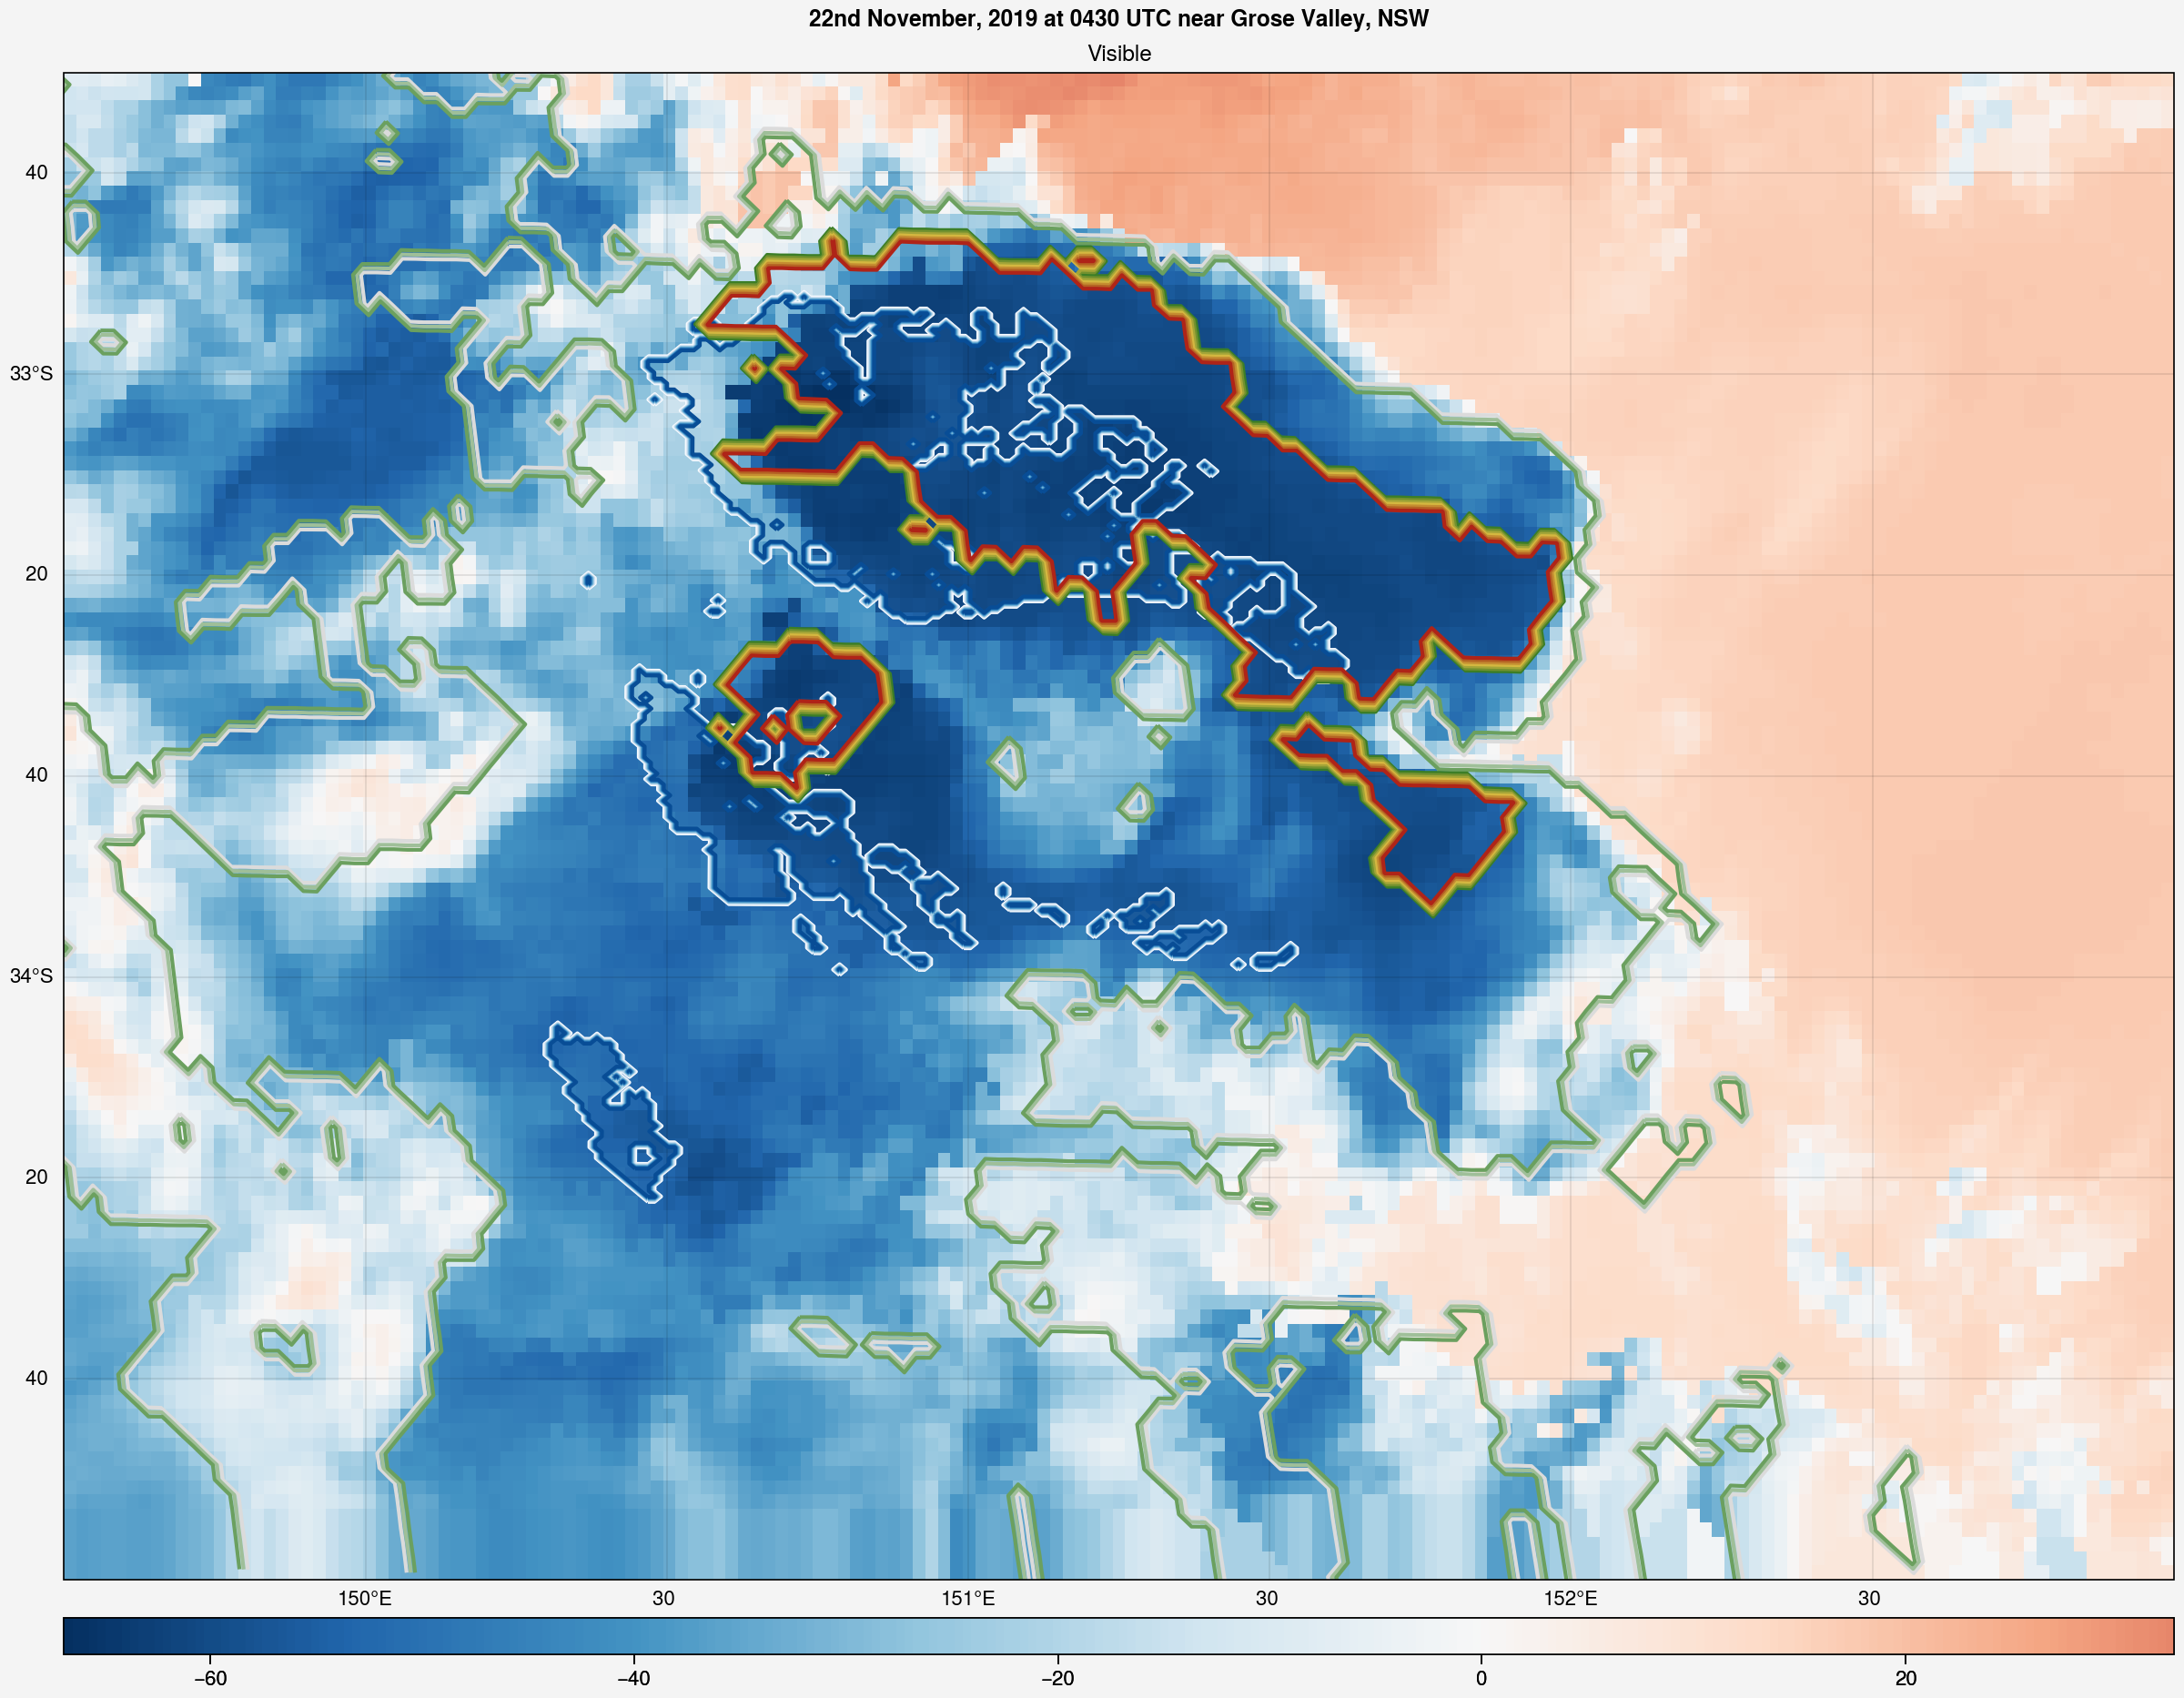

In [173]:
## Creates a graph showcasing difference between Adrien's classification and Peterson classification, with background data being from Band 15 of Himawari.
fig, axs = pplt.subplots(ncols=1, nrows=1, width=12, suptitle="22nd November, 2019 at 0430 UTC near Grose Valley, NSW", sharex = False, sharey = False, projection=ccrs.PlateCarree())
mask = np.where(lab == 6, True, False)
m = axs[0].imshow(interpolate_bt15, transform = ccrs.PlateCarree(), extent=[minLon, maxLon, minLat, maxLat])
axs[0].colorbar(m, loc='b')
axs[0].set_extent([minLon, maxLon, minLat, maxLat])
axs[0].format(lonlim=(minLon, maxLon), latlim=(minLat, maxLat), labels=True, title="Visible")
axs[0].contour(longs_radar, lats_radar, mask, cmap='blues')
axs[0].contour(config_area.lon[0,:,:], config_area.lat[0,:,:], peterson, vmax = 4, ymin=minLat, ymax= maxLat,
                     cmap = md.get_peterson_palette(), alpha = 1, transform=ccrs.PlateCarree())
# fig.save('figures/20191122/Cloud_Microphysics_Test.png', dpi=300)

In [28]:
## Getting lightning dataset.
lightning_ds = getLightningData(2019, 11, 22, '0430', minLat, maxLat, minLon, maxLon)
ltng = np.where(lightning_ds.lightning_density > 0, lightning_ds.lightning_density, np.nan)
radar = pyart.io.read('data/Radar/20191122_71/71_20191122_043030_ppi.nc')
radar = updateRadarData(radar)

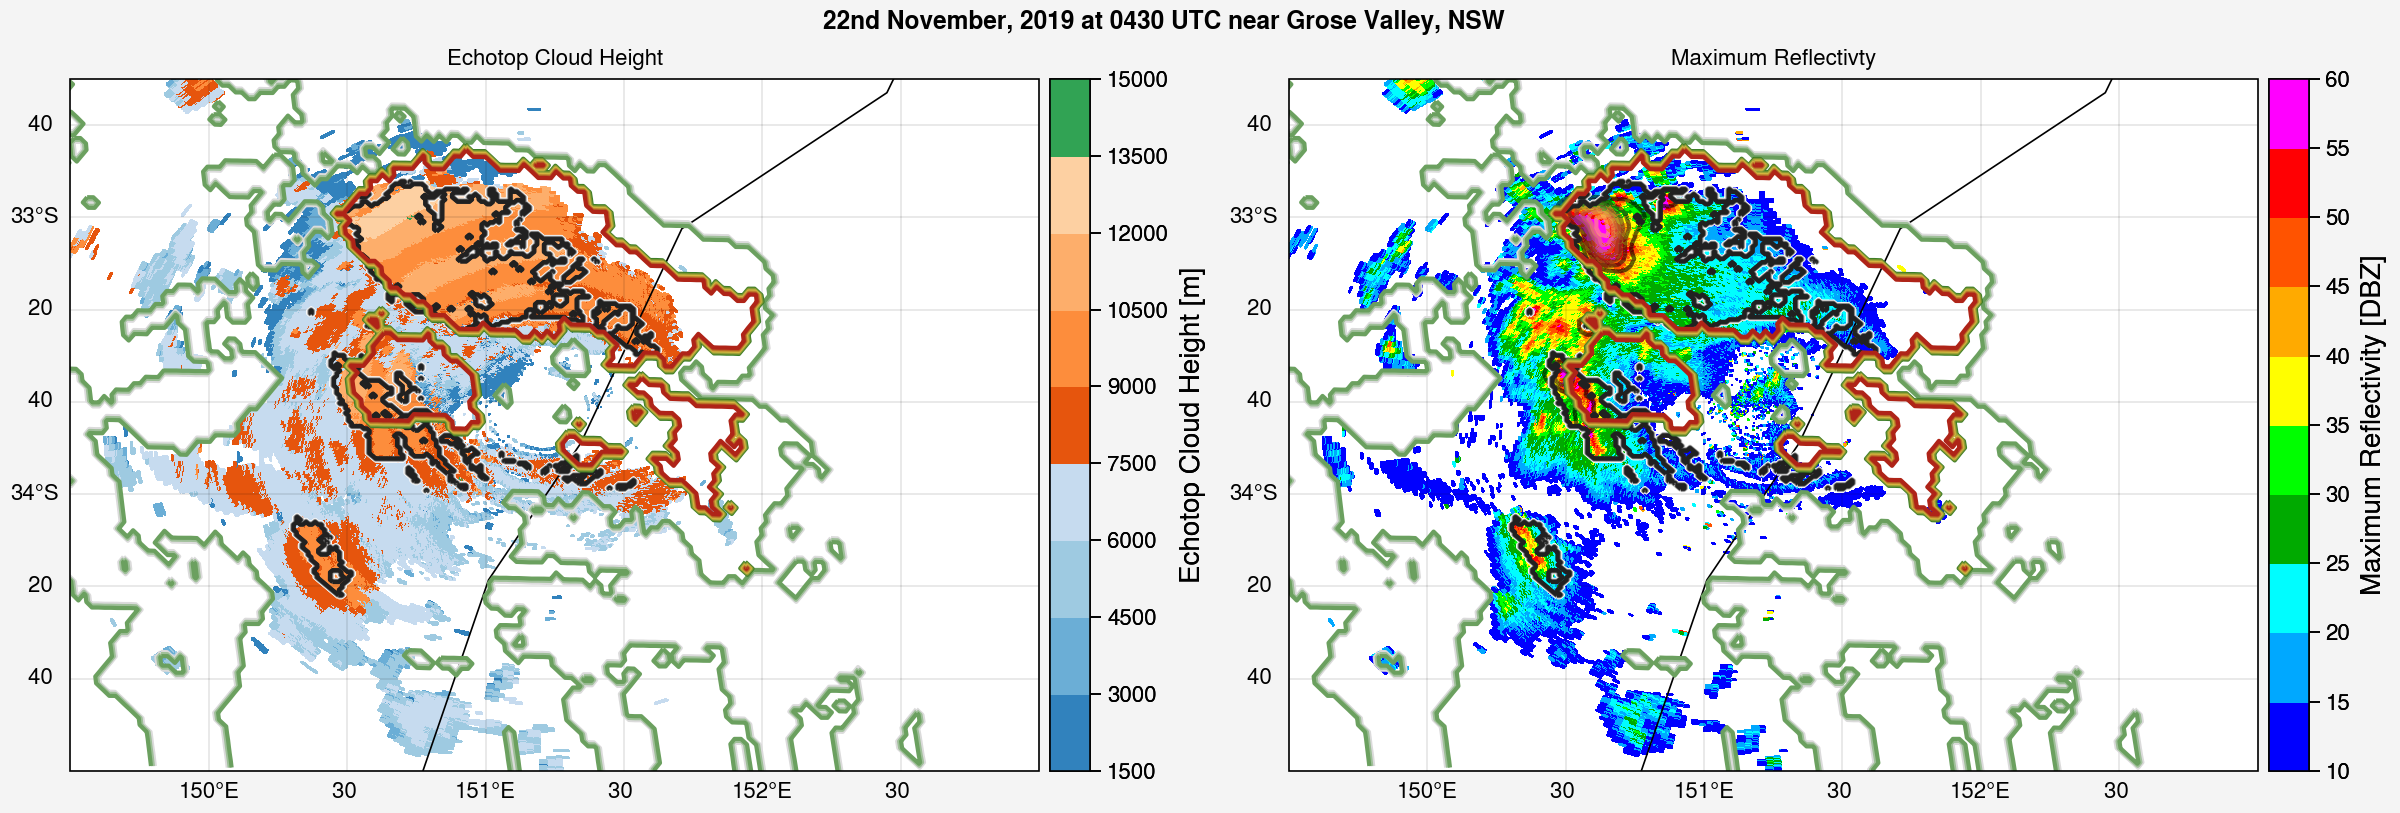

In [29]:
## Extracting radar properties to compare real location of PyroCB to Peterson location.
fig, axs = pplt.subplots(ncols=2, nrows=1, width=12, suptitle="22nd November, 2019 at 0430 UTC near Grose Valley, NSW", sharex = False, sharey = False, projection=ccrs.PlateCarree())
mask = np.where(lab == 6, True, False)
display = pyart.graph.RadarMapDisplay(radar, shift=(0,0))
axs[0].set_extent([minLon,maxLon,minLat,maxLat])
display.plot_ppi_map('echotop_cloud_height', cmap='tab20c', vmin=1000, 
                     colorbar_label = "Echotop Cloud Height [m]", vmax=15000, sweep=0, ax=axs[0], min_lat=minLat, max_lat=maxLat, min_lon=minLon, max_lon=maxLon, title="Echotop Cloud Height")
axs[0].format(labels=True)
axs[0].contour(longs_radar, lats_radar, mask, cmap='greys')
axs[0].contour(config_area.lon[0,:,:], config_area.lat[0,:,:], peterson, vmax = 4, ymin=minLat, ymax= maxLat,
                     cmap = md.get_peterson_palette(), alpha = 1, transform=ccrs.PlateCarree())
axs[1].set_extent([minLon, maxLon, minLat, maxLat])
display.plot_ppi_map('maximum_reflectivity', ax=axs[1], sweep=0, cmap="pyart_refdiff", vmin=10, vmax=60, title='Maximum Reflectivty', 
                     colorbar_label="Maximum Reflectivity [DBZ]", min_lat=minLat, max_lat=maxLat, min_lon=minLon, max_lon=maxLon)
axs[1].contour(lightning_ds.longitude, lightning_ds.latitude, ltng, vmax = 1.1*np.nanmax(ltng), ymin=minLat, ymax=maxLat,
                     cmap = 'copper', alpha = 0.6, transform=ccrs.PlateCarree())
axs[1].format(labels=True)
cs = axs[1].contour(longs_radar, lats_radar, mask, cmap='greys')
axs[1].contour(config_area.lon[0,:,:], config_area.lat[0,:,:], peterson, vmax = 4, ymin=minLat, ymax= maxLat,
                     cmap = md.get_peterson_palette(), alpha = 1, transform=ccrs.PlateCarree())
# fig.save('figures/20191122/Cloud_Microphysics_Test.png', dpi=300)

In [30]:
lvl_lookup = dict(zip(cs.collections, cs.levels))

# loop over collections (and polygons in each collection), store in list for fiona

list_polygons =[]
for col in cs.collections:
    z=lvl_lookup[col] # the value of this level
    for contour_path in col.get_paths():
        # create the polygon for this level
        for ncp,cp in enumerate(contour_path.to_polygons()):
            lons = np.array(cp)[:,0]
            lats = np.array(cp)[:,1]
            new_shape = geometry.Polygon([(i[0], i[1]) for i in zip(lons,lats)])
            if ncp == 0:                
                poly = new_shape # first shape
            else:
                poly = poly.difference(new_shape) # Remove the holes
            
            list_polygons.append(poly)

In [156]:
## Get band 14 and band 7 data from Himawari satellite and in parallax corrected form
sza_ds = getSatelliteData(2019, 11, 22, '0430', 'f_sza')[0]
proj4string_sat = sza_ds.geostationary.proj4
f14 = getSatelliteData(2019, 11, 22, '0430', 'f14')[0]
f7 = getSatelliteData(2019, 11, 22, '0430', 'f7')[0]
xmin, xmax, ymin, ymax = getXYBoundaries(2019, 11, 22, '0430', minLat, maxLat, minLon, maxLon)
b14_area = f14.sel(x=slice(xmin, xmax), y=slice(ymax, ymin))
b7_area = f7.sel(x=slice(xmin, xmax), y=slice(ymax, ymin))
shifted_bt7 = get_shifted_array(b7_area.channel_0007_brightness_temperature.values, minLat, maxLat, minLon, maxLon, 2019, 11, 22, '0430')
shifted_bt14 = get_shifted_array(b14_area.channel_0014_brightness_temperature.values, minLat, maxLat, minLon, maxLon, 2019, 11, 22, '0430')
interpolate_bt14 = interpolate(shifted_bt14)
interpolate_bt14 -= 273.15
interpolate_bt7 = interpolate(shifted_bt7)
interpolate_bt7 -= 273.15

In [138]:
# Now let's create the satellite's mask for that contour

lat_2d_him, lon_2d_him = md.calc_lat_lon_from_proj(proj4string_sat, b16_area.y.values, b16_area.x.values)

contours = list_polygons
mask_him = md.get_mask_from_contours(contours, lat_2d_him, lon_2d_him)
c7_masked = np.zeros_like(interpolate_bt16)

list_pixels_contour = []
for i in range(mask_him.shape[0]) :
    for j in range(mask_him.shape[1]) :
        if mask_him[i, j] :
            c7_masked[i, j] = interpolate_bt16[i, j]
            list_pixels_contour.append((i, j))
        else :
            c7_masked[i, j] = np.nan

100%|██████████| 789/789 [05:12<00:00,  2.52it/s]


In [157]:
## Append the band 7 and band 14 values from within the Peterson contours to the arrays holding those values.
values = []
values2 = []
for (i, j) in list_pixels_contour :
    values.append(interpolate_bt7[i, j])
    values2.append(interpolate_bt14[i, j])
values = np.array(values)
values2 = np.array(values2)

In [161]:
np.min(intense_bt7-intense_bt14)

50.0625

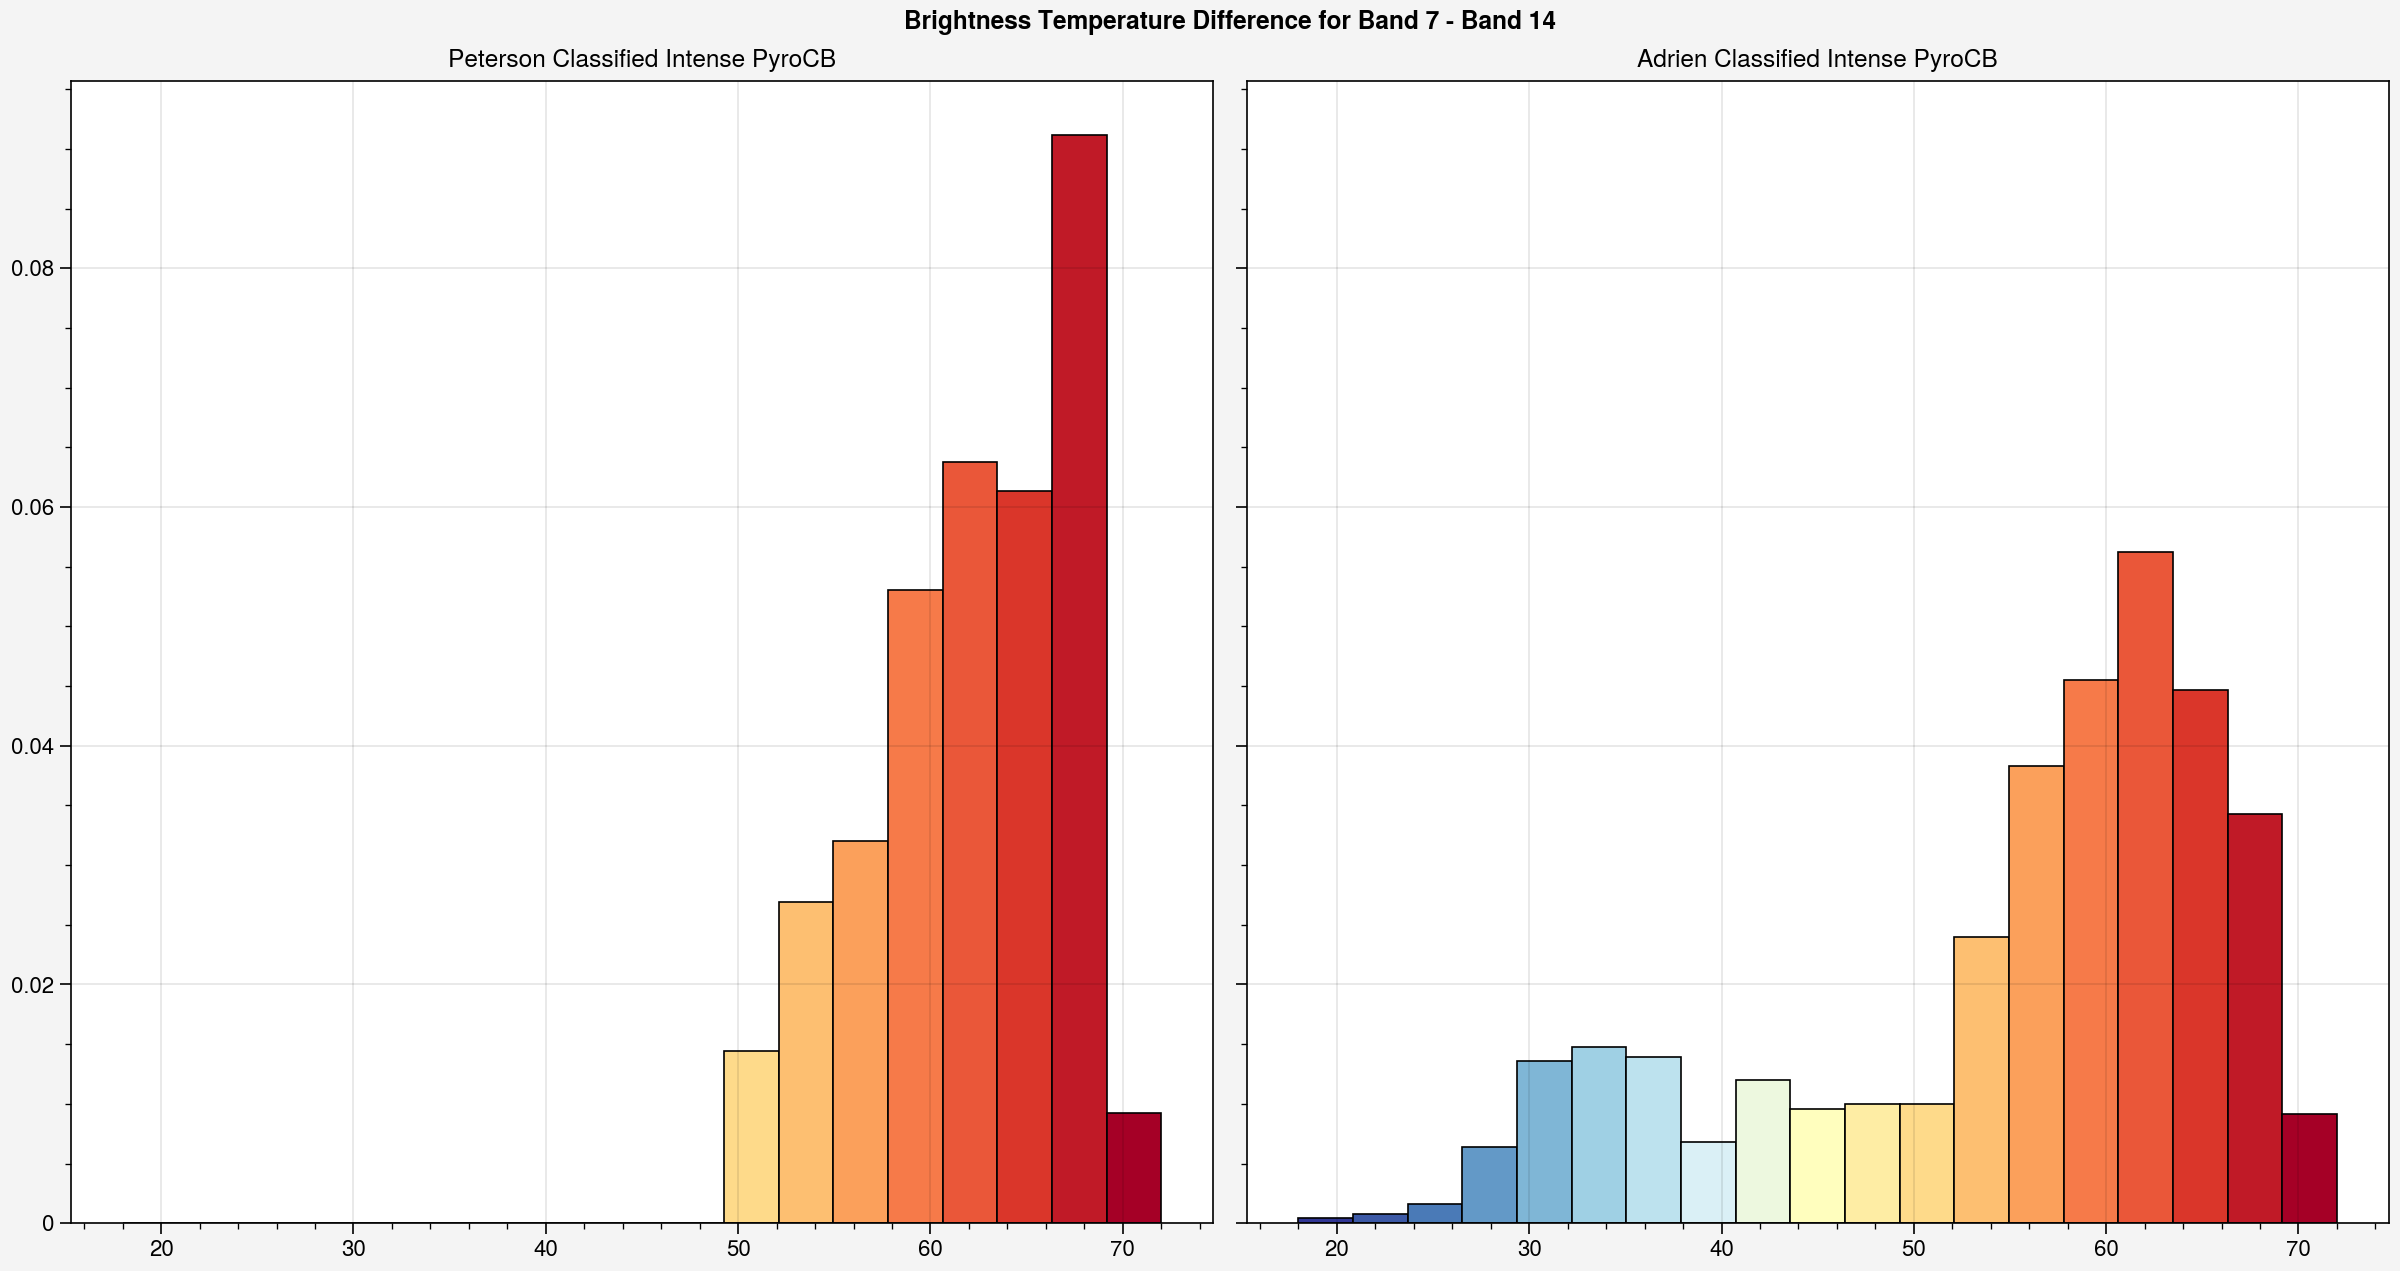

In [163]:
## Extracting various brightness temperatures from actual PyroCB vs. Peterson PyroCB

peterson = getPetersonArray(2019, 11, 22, '0430', minLat, maxLat, minLon, maxLon)
intense_peterson = np.where((peterson==4), True, False)
bt7 = get_interpolated_channel(7, 2019, 11, 22, '0430', minLat, maxLat, minLon, maxLon)
bt14 = get_interpolated_channel(14, 2019, 11, 22, '0430', minLat, maxLat, minLon, maxLon)

intense_bt7 = bt7[intense_peterson]
intense_bt14 = bt14[intense_peterson]

mask = np.where(lab <= 6, True, False)

# other_bt8 = bt8[mask]

fig, axs = pplt.subplots(ncols=2, nrows=1, width=12, figtitle="Brightness Temperature Difference for Band 7 - Band 14")
## This is the first graph created
bins = np.linspace(18, 72, 20)
n, bins, patches = axs[0].hist(intense_bt7-intense_bt14, bins=bins, density=True, edgecolor='black')
cm = pl.cm.get_cmap('RdYlBu_r')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    pl.setp(p, 'facecolor', cm(c))
axs[0].format(title="Peterson Classified Intense PyroCB")
    

## This is the second graph created
bins = np.linspace(18, 72, 20)
n, bins, patches = axs[1].hist(values-values2, bins=bins, density=True, edgecolor='black')
cm = pl.cm.get_cmap('RdYlBu_r')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    pl.setp(p, 'facecolor', cm(c))
axs[1].format(title="Adrien Classified Intense PyroCB")
fig.save('figures/20191122/Cloud_Microphysics_Test_Comparison.png', dpi=300)

(427, 676)
(427, 676)
(427, 676)
(106, 169)


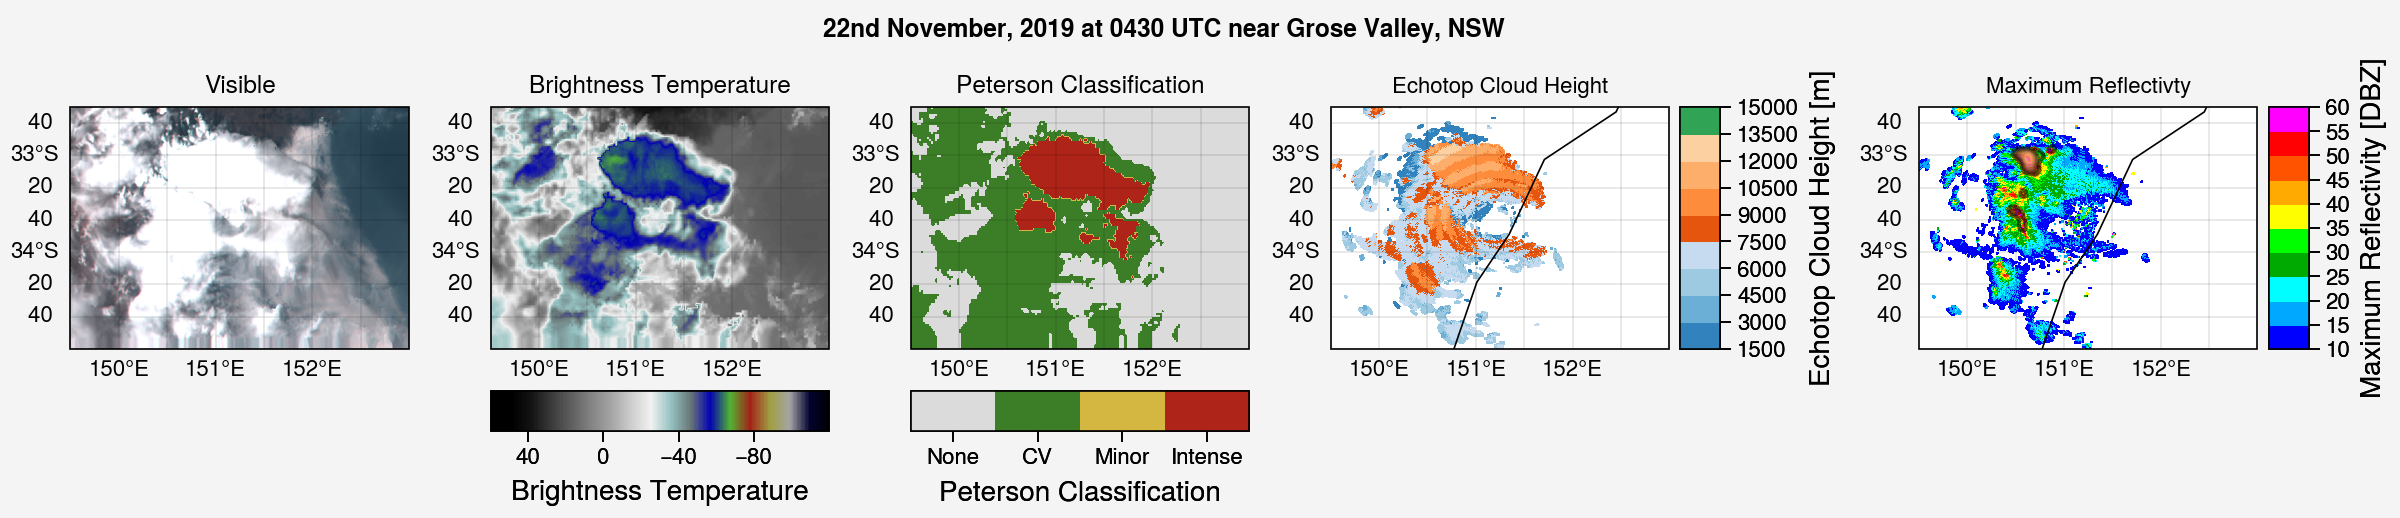

In [38]:
## Creating a 5-panel plot showing all data over the forecast area during the time the graphs above were constructed (0430 UTC)
minLat = -35
maxLat = -32.5
minLon = 149.5
maxLon = 153
rgb = getHighResCroppedVisible(2019, 11, 22, '0430', minLat, maxLat, minLon, maxLon)
bt13 = getBT(2019, 11, 22, '0430', minLat, maxLat, minLon, maxLon)
peterson = getPetersonArray(2019, 11, 22, '0430', minLat, maxLat, minLon, maxLon)
lightning_ds = getLightningData(2019, 11, 22, '0430', minLat, maxLat, minLon, maxLon)
ltng = np.where(lightning_ds.lightning_density > 0, lightning_ds.lightning_density, np.nan)
radar = pyart.io.read('data/Radar/20191122_71/71_20191122_043030_ppi.nc')
radar = updateRadarData(radar)

kw = dict(cmap='gray')
fig, axs = pplt.subplots(ncols=5, nrows=1, width=12, suptitle="22nd November, 2019 at 0430 UTC near Grose Valley, NSW", sharex = False, sharey = False, projection=ccrs.PlateCarree())
labels = list(("None", "CV", "Minor", "Intense"))
axs[0].imshow(rgb, transform = ccrs.PlateCarree(), extent=[minLon, maxLon, minLat, maxLat])
axs[0].set_extent([minLon, maxLon, minLat, maxLat])
axs[0].format(lonlim=(minLon, maxLon), latlim=(minLat, maxLat), labels=True, title="Visible")
m = axs[1].imshow(bt13, cmap=md.get_zehr_colormap(), vmin=-120, vmax=60, transform=ccrs.PlateCarree(), extent=[minLon, maxLon, minLat, maxLat])
axs[1].set_extent([minLon, maxLon, minLat, maxLat])
axs[1].colorbar(m, loc='b', label='Brightness Temperature', ticks=[40,20,0,-20,-40,-60,-80,-100], reverse=True)
axs[1].format(lonlim=(minLon,maxLon), latlim=(minLat,maxLat), labels=True, title="Brightness Temperature")
n = axs[2].imshow(peterson, cmap=md.get_peterson_palette(), vmin=0.5, vmax=4, discrete=True, N=5, transform=ccrs.PlateCarree(), extent=[minLon, maxLon, minLat, maxLat])
axs[2].colorbar(n, loc='b', ticks=np.arange(0.8, 4.1, 0.8) + 0.4, ticklabels=labels, label="Peterson Classification")
axs[2].set_extent([minLon, maxLon, minLat, maxLat])
axs[2].format(lonlim=(minLon, maxLon), latlim=(minLat, maxLat), labels=True, title="Peterson Classification")
display = pyart.graph.RadarMapDisplay(radar, shift=(0,0))
axs[3].set_extent([minLon,maxLon,minLat,maxLat])
display.plot_ppi_map('echotop_cloud_height', cmap='tab20c', vmin=1000, 
                     colorbar_label = "Echotop Cloud Height [m]", vmax=15000, sweep=0, ax=axs[3], min_lat=minLat, max_lat=maxLat, min_lon=minLon, max_lon=maxLon, title="Echotop Cloud Height")
axs[3].format(labels=True)
axs[4].set_extent([minLon, maxLon, minLat, maxLat])
display.plot_ppi_map('maximum_reflectivity', ax=axs[4], sweep=0, cmap="pyart_refdiff", vmin=10, vmax=60, title='Maximum Reflectivty', 
                     colorbar_label="Maximum Reflectivity [DBZ]", min_lat=minLat, max_lat=maxLat, min_lon=minLon, max_lon=maxLon)
axs[4].contour(lightning_ds.longitude, lightning_ds.latitude, ltng, vmax = 1.1*np.nanmax(ltng), ymin=minLat, ymax=maxLat,
                     cmap = 'copper', alpha = 0.6, transform=ccrs.PlateCarree())
axs[4].format(labels=True)